# Efficient Frontier

Here we will carry out the Mean Variance optimization for a portfolio containing two risky assets. First we will find the return and risk of two stocks from their price data. Then we plot the return and risk of arbitrarily weighted portfolios and identify the efficient frontier.

The two assets we choose are Facebook and Proctor&Gamble, one tech stock and one staples stock. These should have a low correlation.

### Loading the necessary packages

In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

### Obtaining the price data from Yahoo finance

In [2]:
asset1=input("please enter the asset1:")
asset2=input("please enter the asset2:")
asset_list = [asset1, asset2]

price_data = pd.DataFrame()

for asset in asset_list:
    price_data[asset] = wb.DataReader(asset, data_source='yahoo', start='2014-01-01')['Adj Close']

price_data.tail()

please enter the asset1:FB
please enter the asset2:FG


,FB,FG
Date,,
2020-02-25,196.770004,11.84
2020-02-26,197.199997,11.73
2020-02-27,189.750000,11.55
2020-02-28,192.470001,11.44
2020-03-02,196.440002,11.74


### Obtaining the Return and Risk of each stock from the logarithm returns

In [3]:
return_data = np.log(price_data/price_data.shift(1))

return_data.head()

asset1_return = return_data[asset1].mean()*250
asset2_return = return_data[asset2].mean()*250

print('The annual return of {0} is {1:.3f} %'.format(asset1,asset1_return*100))
print('The annual return of {0} is {1:.3f} %'.format(asset2,asset2_return*100))

asset1_vol = np.sqrt(return_data[asset1].var()*250)
asset2_vol = np.sqrt(return_data[asset2].var()*250)

print('The annual volatility of {0} is {1:.3f} %'.format(asset1,asset1_vol*100))
print('The annual volatility of {0} is {1:.3f} %'.format(asset2,asset2_vol*100))

print('The Covariance matrix is:')
print(return_data.cov()*250)

The annual return of FB is 20.622 %
The annual return of FG is 5.663 %
The annual volatility of FB is 29.579 %
The annual volatility of FG is 24.308 %
The Covariance matrix is:
          FB        FG
FB  0.087490  0.010263
FG  0.010263  0.059086


### Obtaining the return and risk of a sample portfolio

Here we obtain the return and risk of a sample portfolio containing these two stocks. Later in this notebook we would repeat the same process for 1000s of such portfolios to generate the efficient frontier.

In [4]:
num_assets = len(asset_list)
print('The Number of Assets is {}'.format(num_assets))

weights = np.random.random(num_assets)
weights /= sum(weights)
print('The sum of the weights is {}'.format(sum(weights)))

pf_1_return = np.sum(weights * return_data.mean()) * 250
print('The annual return of the portfolio is {0:.3f} %'.format(pf_1_return*100))

pf_1_vol = np.sqrt(np.dot(weights.T,np.dot(return_data.cov() * 250, weights)))
print('The annual volatility of the portfolio is {0:.3f} %'.format(pf_1_vol*100))


The Number of Assets is 2
The sum of the weights is 1.0
The annual return of the portfolio is 14.216 %
The annual volatility of the portfolio is 21.086 %


### Obtaining the return and risk of random portfolios and plotting the efficient frontier

Here we obtain the return and volatility of 1000s of sample portfolios containing these two stocks randomly weighted. For each portfolio we calculate the return and volatility which we then append to a list. We then convert the lists into a Pandas dataframe and plot the return and risk of each portfolio to visualize the efficient frontier.

Note: These are long only portfolios. This is not always an adequate assumption but is generally true for retail investors

In [5]:
iterations = 1000
pf_returns = []
pf_vol = []

In [6]:
for _ in range(iterations):
    weights = np.random.random(len(asset_list))
    weights /= sum(weights)
    pf_returns.append((np.sum(weights * return_data.mean()) * 250)*100)
    pf_vol.append((np.sqrt(np.dot(weights.T,np.dot(return_data.cov() * 250, weights))))*100)

In [7]:
portfolios = pd.DataFrame({'Return': pf_returns, 'Volatility': pf_vol})
portfolios.head()

,Return,Volatility
0,16.481138,23.322123
1,12.926920,20.345056
2,18.700426,26.405841
3,13.581856,20.668348
4,11.599737,20.046699


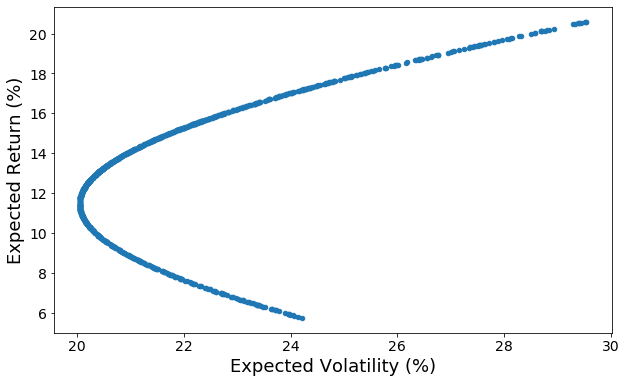

In [8]:
portfolios.plot(x='Volatility', y='Return', kind='scatter', figsize=(10, 6));
plt.xlabel('Expected Volatility (%)', size = 18)
plt.ylabel('Expected Return (%)', size = 18)
plt.tick_params(labelsize=14)

The Efficient Frontier is the upper section of this plot.